In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the batch size and image size
batch_size = 32
img_size = (224, 224)

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Create the data generators for train/validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Load the pre-trained MobileNet model without the top layer
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

In [ ]:
# Add a global average pooling layer and a dense layer for the custom classification task
x = GlobalAveragePooling2D()(mobilenet.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Create the custom model
model = Model(inputs=mobilenet.input, outputs=predictions)

In [ ]:
# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

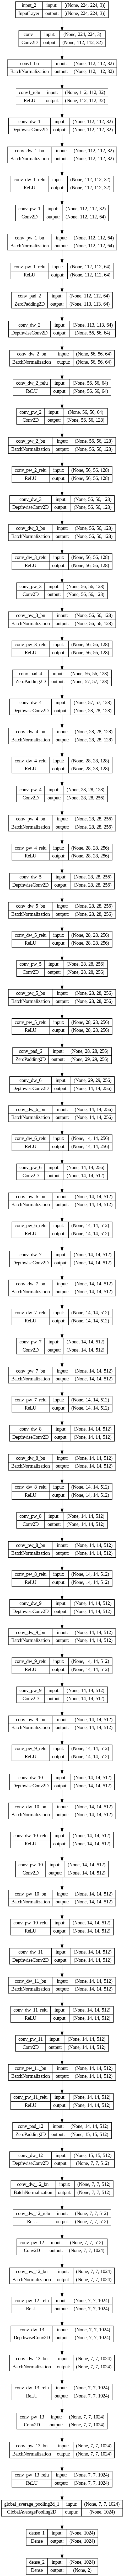

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.7 MB/s eta 0:00:00


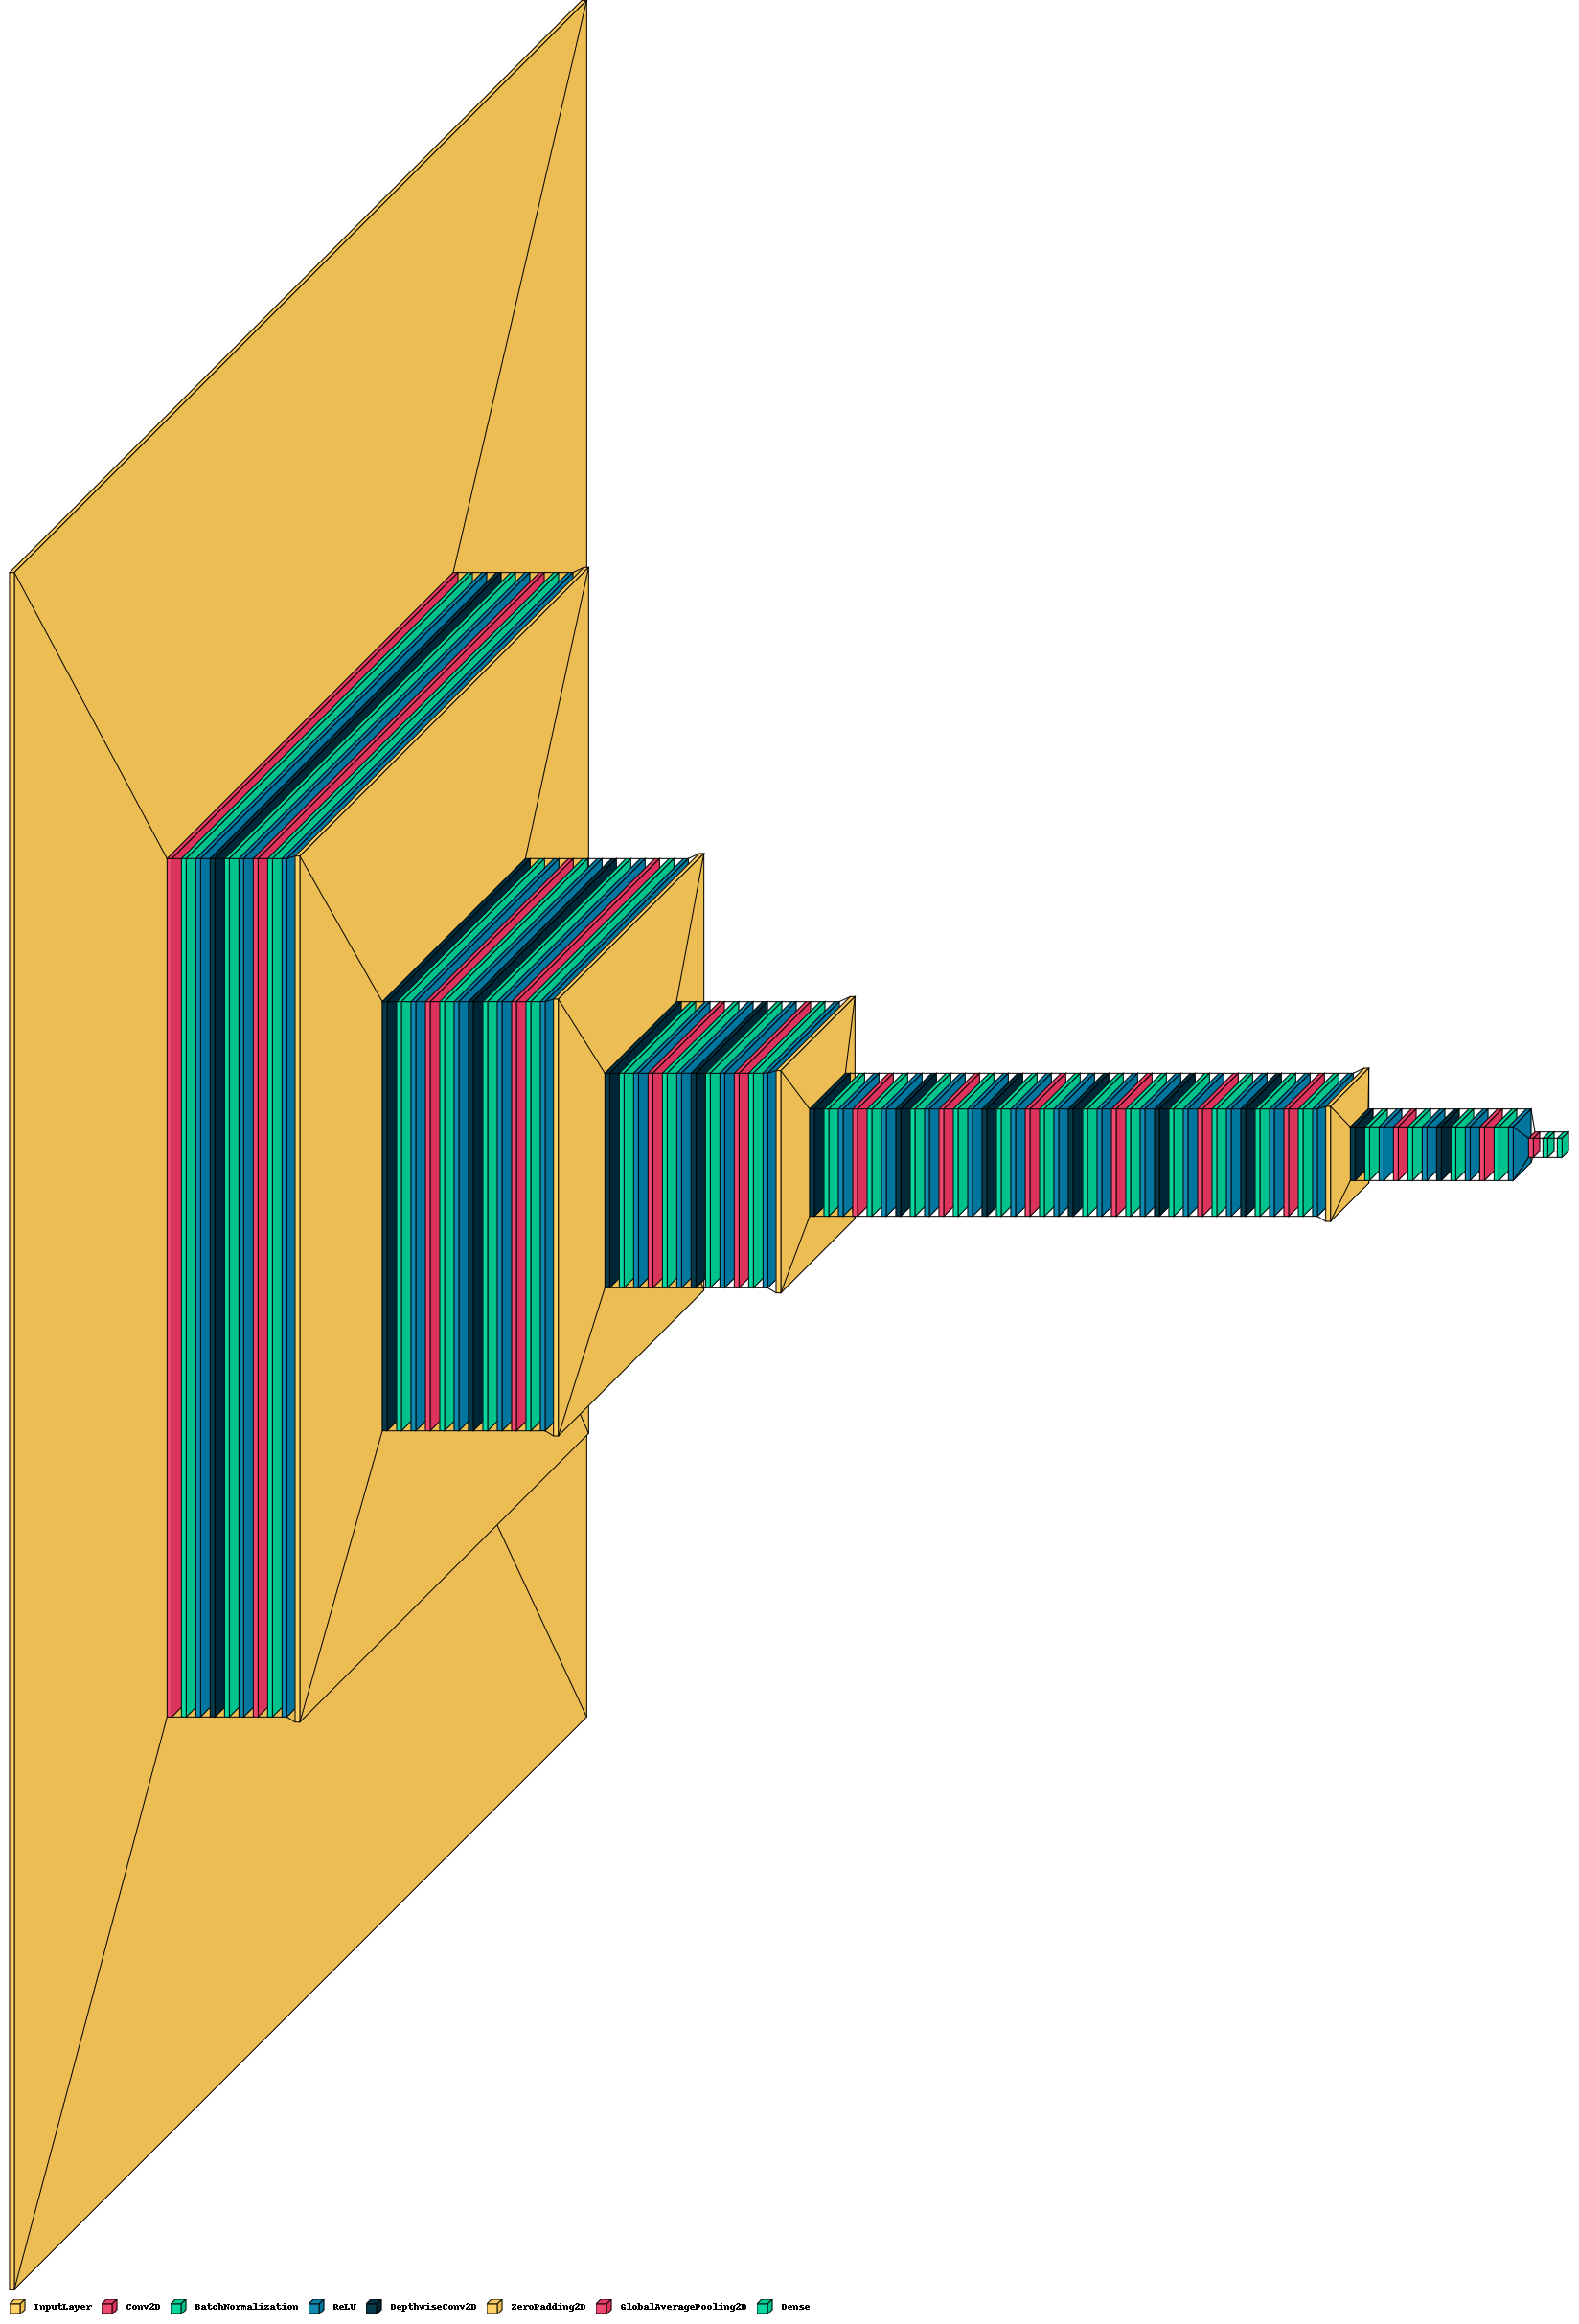

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=5, max_z=5, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model with the train and validation generators
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 454s 16s/step - loss: 0.9387 - accuracy: 0.7690 - val_loss: 1.1166 - val_accuracy: 0.7111
Epoch 2/10
27/27 [==============================] - 63s 2s/step - loss: 0.1588 - accuracy: 0.9429 - val_loss: 2.3138 - val_accuracy: 0.7000
Epoch 3/10
27/27 [==============================] - 62s 2s/step - loss: 0.0542 - accuracy: 0.9810 - val_loss: 0.9471 - val_accuracy: 0.8611
Epoch 4/10
27/27 [==============================] - 63s 2s/step - loss: 0.0766 - accuracy: 0.9786 - val_loss: 2.0498 - val_accuracy: 0.7389
Epoch 5/10
27/27 [==============================] - 62s 2s/step - loss: 0.0781 - accuracy: 0.9762 - val_loss: 2.5355 - val_accuracy: 0.7278
Epoch 6/10
27/27 [==============================] - 63s 2s/step - loss: 0.0413 - accuracy: 0.9857 - val_loss: 1.2423 - val_accuracy: 0.8222
Epoch 7/10
27/27 [==============================] - 62s 2s/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.6288 - val_accuracy: 0.8889
Epoch 8/10
27/27 [

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 99s 20s/step - loss: 0.8677 - accuracy: 0.8389


[0.8677311539649963, 0.8388888835906982]

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 5s 827ms/step - loss: 0.9136 - accuracy: 0.8333
Validation Loss: 0.9135878682136536
Validation Accuracy: 0.8333333134651184


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 6s 834ms/step - loss: 0.8677 - accuracy: 0.8389
Test Loss: 0.8677310347557068
Test Accuracy: 0.8388888835906982


In [ ]:
# Save the model
#model.save('vgg19_custom.h5')